# Chapter 2: Information Criterions and Bootstrap Confidence Intervals

In this chapter, we'll cover the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for nested models, as well as the bootstrap method for confidence intervals. 

## Nested Models

Let's say we have model A with variables $\theta_1$, $\theta_2$ and $\theta_3$. Model B is nested in model A if model B contains a subset of the variables of model A, e.g. if model B has variables $\theta_1$ and $\theta_3$. We call model B a $\textbf{nested model}$. 
Model B is $\textbf{not}$ a nested model if it contains a variable that model A doesn't contain, e.g. if model B has variables $\theta_1$, $\theta_3$ and $\theta_4$. 

Model A can be seen as the true model which describes the data. When researching, you don't know the true model, but you can construct a model B which is a nested model of model A. In order to check if model B doesn't include unnecessary parameters and that the model isn't overfitting the data, the Akaike Information Criterion and the Bayesian Information Criterion can be used.  


## Akaike Information Criterion (AIC)
The Akaike Information Criterion (AIC) is an estimator of prediction error of statistical models. It is a method for evaluating how well a model fits the data it was generated from. AIC is used to compare different models and determine which model is the best fit. This best fit is the one that explains the greatest amount of variation and has the minimal amount of information loss, using the fewest amount of parameters. The equation for the AIC is as follows;

<a id="eq:AIC"></a>
$$AIC = - 2\max\left[\ln(L)\right] + 2p_k .\tag{2.1}$$
It combines the max-likelihood and the number of parameters $p_k$. The best model will give the lowest value. From [Eq. 2.1](#eq:AIC) you can see that the AIC discourages overfitting. By adding more parameters, the AIC value will increase. The goodness of the fit, determined with the max-likelihood, will help decrease the AIC score.

**Note**: The AIC gives a qualitative comparison between models, it *does not* say anything about the quality of the models themself. So after selecting a model with the AIC, you need to validate the quality of the model. This can be done for instance by checking the models residuals.

### Simple usage of AIC values
Let $\mathrm{AIC}_{min}$ be the minimal AIC value. The following expression can be used to compare different AIC scores ($\mathrm{AIC}_{i}$) with $\mathrm{AIC}_{min}$.
<a id="eq:AIC comparison"></a>
$$c = e^{\frac{\mathrm{AIC}_{min} - \mathrm{AIC}_{i}}{2}},\tag{2.2}$$
This quantity $c$ is proportional to the probability of that the model $\mathrm{AIC}_{i}$ minimizes the information loss.
Say you have three models with the following values: $\mathrm{AIC}_1 = 101$, $\mathrm{AIC}_2 = 104$ and $\mathrm{AIC}_3 = 111$.

[//]: # "'vo!!!!!!!"
\begin{equation}
c = 
\begin{cases}
e^{\frac{101 - 104}{2}} \approx 0.223 \\
e^{\frac{101 - 111}{2}} \approx 0.007\\
\end{cases}
\end{equation}
This means that model 2 is 0.223 times and model 3 is 0.007 times as probable as model 1 to minimize the information loss.


## Bayesian Information Criterion (BIC)


## Bootstrap and confidence intervals

The bootstrap method is a technique used to estimate a confidence interval for a parameter which inherently does not have a confidence interval. Thus before we talk about the bootstrap method and how it works we first need to understand confidence intervals. 

### Confidence intervals

Is a way to easily say some value can be found with a certain $\gamma$-confidence within an interval. For example, you want to find your parameter $\theta$ with $\gamma$ = 95% confidence. It would not suffice to find some value $\theta$ within your data and say that you are 95% confident that the found $\theta$ is the actual $\theta$. You need to find the boundary of the interval in which you find $\theta$ 95% of the time. Thus eventually founding ($\theta_{lower}$, $\theta_{higher}$), now you have expressed an interval in which you can say a found $\theta$ resides 95% of the time.

The theorem behinds this states, and shows a way to compute it:

If $\hat{\theta} \approx N(\hat{\theta}^{*}, se[\hat{\theta}]^2)$ and $\hat{se}[\hat{\theta}] \rightarrow_p se[\hat{\theta}]$, the interval 
<a id="eq:CI"></a>
$$(\hat{\theta}_l, \hat{\theta}_u) = (\hat{\theta} - z_{\alpha/2} \hat{se}[\hat{\theta}], \hat{\theta} + z_{\alpha/2} \hat{se}[\hat{\theta}])$$
is an approximate $(1-\alpha)$-confidence interval where $z_{\alpha/2}$ are the corresponding quantile coming from $\gamma = 1 - \alpha$.

Below an example using a normal distribution and a poisson distribution is given.

The actual confidence interval would be (-1.96, 1.96)


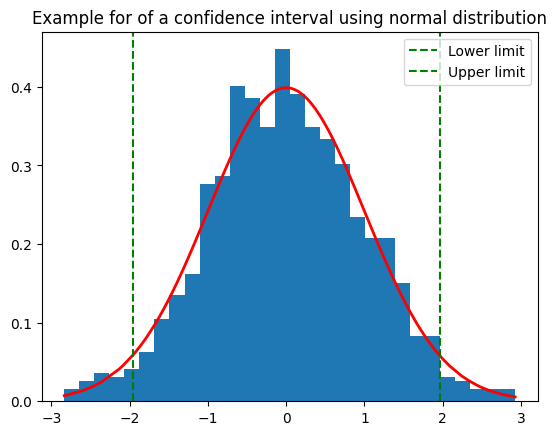

In [1]:
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt

# Here we generate some data like a normal distribution
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 1000)
x.sort()

gamma = 95 #The confidence we choose

# calculating the z value
def z_alpha (gam):
    alpha = 1-(gam/100)
    z = norm.ppf(1-(alpha/2))
    return z

z = z_alpha(gamma)

lower = mu - z*sigma
upper = mu + z*sigma


print(f"The actual confidence interval would be ({lower.round(2)}, {upper.round(2)})")

plt.title("Example for of a confidence interval using normal distribution")
plt.hist(x, 30, density=True)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.axvline(lower, color = 'g', linestyle="--", label="Lower limit")
plt.axvline(upper, color = 'g', linestyle="--", label="Upper limit")
plt.legend()
plt.show()

### Bootstrap method

Suppose you have a dataset with a large number of entries and you want to use bayesian statistics to further develop a posterior likelihood. You need to have some distribution of your parameter which you can use later on, but you only have one dataset and thus one way to compute the parameter. The bootstrap method provides a way to develop a confidence interval for this parameter. This is done by the bootstrap algorithm:

- Step 1: Simulate $B \in \mathbb{N}$ independent datasets $X_{1,b}, ..., X_{n,b}$ from F, for $b = 1, ..., N$. Thus simulating $B$ bootstrap samples.
- Step 2: For each $b$, compute the parameter $\hat{\theta_b}$
- Step 3: Define your $\gamma$-confidence interval with $\hat{q}_{\alpha/2}$ and $\hat{q}_{\alpha/2}$ for each parameter $\hat{\theta_1}, ..., \hat{\theta_B}$
- Step 4: Define your confidence intervals
<a id="eq:upper_lower"></a>
$$(\hat{\theta}_l, \hat{\theta}_u) = (\hat{q}_{\alpha/2}, \hat{q}_{1-\alpha/2})$$

You can imagine that for large $B$ and $n$, the distribution for $\hat{\theta}$ with $(\hat{\theta_l},\hat{\theta_u})$ is an $(1-\alpha)$-confidence interval so long $\hat{\theta}$ is unbiased.


500


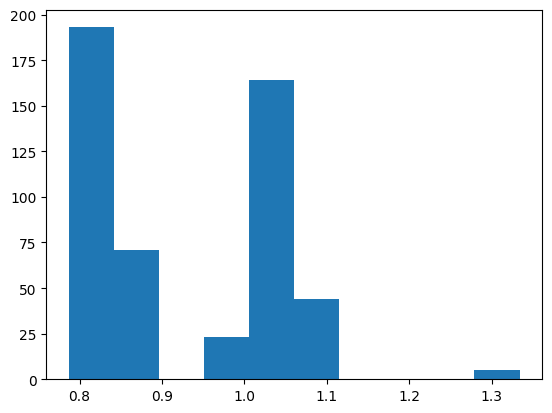

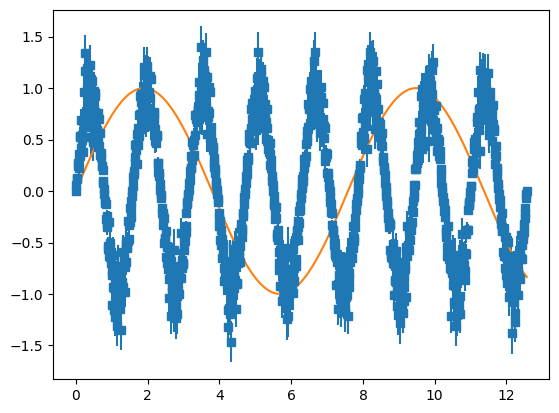

In [33]:
from scipy.optimize import curve_fit
import random

# Bootstrap exercise with sin(ax) as example
a_true = 4

x_min = 0
x_max = 4*np.pi
N = 1000
x = np.linspace(x_min, x_max, N)

def sinx(x, a):
    return np.sin(a*x)

def sim_data(x, fractional_uncertainty=0.2):

	# find the model prediction
	y_true = sinx(x, a_true)

	# find the true uncertainty on the observations
	y_unc_true = np.abs(y_true)*fractional_uncertainty

	# generate data for a normal distribution
	y_sample = np.random.normal(y_true, y_unc_true, size=len(x))

	return y_sample, y_unc_true

y_samp, y_unc = sim_data(x)

bootstrap_samples = 500


a_s = []
for i in range(bootstrap_samples):
    x_data = []
    y_data = []
    for i in range(N):
        temp = random.randint(0, (N-1))
        x_data.append(x[temp])
        y_data.append(y_samp[temp])
    popt, pcov = curve_fit(sinx, x_data, y_data, absolute_sigma=True, maxfev=800)
    a_s.append(popt[0])


# for i in range(N_sim):

popt, pcov = curve_fit(sinx, x, y_samp, absolute_sigma=True, maxfev = 800)
	# a_s.append(popt[0])
# print(popt, pcov)

## Suppose we want to find a distribution for a, 
## we see that we can only get one a from this dataset. 
## Thus we use bootstrap to generate a distribution
print(len(a_s))
plt.hist(a_s)
plt.show()

plt.errorbar(x, y_samp, y_unc, fmt='s')
plt.plot(x, sinx(x, *popt))
plt.show()